## Tables

In [5]:
import pandas as pd

# Define mappings for shortening dataset names
dataset_mapping = {
    "ECG200": "ECG",
    "EOGHorizontalSignal": "EOGH",
    "EOGVerticalSignal": "EOGV",
    "Epilepsy": "EPI",
    "CinCECGTorso": "CET",
    "ECG5000": "ECG5",
    "ECGFiveDays": "ECGFD",
    "StandWalkJump": "SWJ",
    "TwoLeadECG": "TECG",
    "NerveDamage": "ND",
    "MedicalImages": "MI",
    "Colposcopy": "COL",
    "EyesOpenShut": "EOS",
    "ToeSegmentation1": "TOE",
    "Heartbeat": "HRT",
    "EMOPain": "EMO",
    "HandMovementDirection": "HMD"
}

# Load the CSV file
df = pd.read_csv('article_results\\final_results.csv')


In [6]:
# Group by dataset to get unique datasets
grouped = df.groupby('dataset').first().reset_index()

# Initialize a list to store table rows
table_rows = []

# Iterate over each dataset
for _, row in grouped.iterrows():
    dataset_name = row['dataset']
    # Add the shortened name in parentheses
    shortened_name = dataset_mapping.get(dataset_name, dataset_name)  # Use original name if no mapping exists
    dataset_name_formatted = f"{dataset_name} ({shortened_name})"
    
    n_variates = int(row['n_variates'])  # Number of variates (e.g., 1 for univariate)
    ts_length = int(row['ts_length'])    # Time series length
    n_classes = int(row['n_classes'])    # Number of classes
    
    # Calculate train and test sizes (80/20 split)
    total_samples = int(row['df_size'])
    train_size = int(total_samples * 0.8)
    test_size = total_samples - train_size
    
    # Format train and test shapes
    train_shape = f"({train_size}, {n_variates}, {ts_length})"
    test_shape = f"({test_size}, {n_variates}, {ts_length})"
    
    # Append to table rows
    table_rows.append([dataset_name_formatted, train_shape, test_shape, n_classes])

# Generate the LaTeX table
latex_table = """
\\begin{tabular}{l c c c}
\\toprule
\\textbf{Dataset} & \\textbf{Train Shape} & \\textbf{Test Shape} & \\textbf{\\# Classes} \\\\
\\midrule
"""

# Add rows to the table
for row in table_rows:
    latex_table += f"{row[0]} & {row[1]} & {row[2]} & {row[3]} \\\\\n"

# Close the table
latex_table += """\\bottomrule
\\end{tabular}
"""

# Print the LaTeX table
print(latex_table)

# Optionally, save the table to a .tex file
with open('dataset_table.tex', 'w') as f:
    f.write(latex_table)


\begin{tabular}{l c c c}
\toprule
\textbf{Dataset} & \textbf{Train Shape} & \textbf{Test Shape} & \textbf{\# Classes} \\
\midrule
CinCECGTorso (CET) & (908, 1, 1639) & (228, 1, 1639) & 4 \\
Colposcopy (COL) & (128, 1, 180) & (32, 1, 180) & 6 \\
ECG200 (ECG) & (128, 1, 96) & (32, 1, 96) & 2 \\
ECG5000 (ECG5) & (3200, 1, 140) & (800, 1, 140) & 5 \\
ECGFiveDays (ECGFD) & (565, 1, 136) & (142, 1, 136) & 2 \\
EMOPain (EMO) & (846, 30, 200) & (212, 30, 200) & 3 \\
EOGHorizontalSignal (EOGH) & (463, 1, 1250) & (116, 1, 1250) & 12 \\
EOGVerticalSignal (EOGV) & (463, 1, 1250) & (116, 1, 1250) & 12 \\
Epilepsy (EPI) & (176, 3, 206) & (44, 3, 206) & 4 \\
EyesOpenShut (EOS) & (62, 14, 128) & (16, 14, 128) & 2 \\
HandMovementDirection (HMD) & (149, 10, 400) & (38, 10, 400) & 4 \\
Heartbeat (HRT) & (261, 61, 405) & (66, 61, 405) & 2 \\
MedicalImages (MI) & (729, 1, 99) & (183, 1, 99) & 10 \\
NerveDamage (ND) & (130, 1, 1500) & (33, 1, 1500) & 3 \\
StandWalkJump (SWJ) & (16, 4, 2500) & (5, 4, 2500) 

In [7]:
# Apply the mappings to shorten dataset names
df['dataset'] = df['dataset'].map(dataset_mapping).fillna(df['dataset'])

# Add percentage to class names
df['class'] = df['class'].astype(str) + " (" + (df['class_perc'] * 100).astype(int).astype(str) + "\%)"

# Sort by dataset and class
df = df.sort_values(by=['dataset', 'class'])

# Initialize variables to track the current dataset
current_dataset = None


# Iterate through the dataset in chunks of 3 rows (one for each model)
for i in range(0, len(df), 3):
    # Get the 3 rows for the current class
    lstm_row = df.iloc[i]
    catch22_row = df.iloc[i + 1]
    rocket_row = df.iloc[i + 2]

    # Print dataset header if it changes
    if lstm_row['dataset'] != current_dataset:
        print("\\midrule")
        print(f"\\textbf{{{lstm_row['dataset']}}}")
        current_dataset = lstm_row['dataset']

    # Format values, replacing std of 0.0 with '-'
    def format_value(value, std):
        return f"{round(value, 3)} & {round(std, 3) if std != 0.0 else '-'}"

    # Format the row
    formatted_row = (
        f"& {lstm_row['class']} "
        f"& {format_value(lstm_row['mean'], lstm_row['std'])} & {round(lstm_row['model_acc'], 3)} "
        f"& {format_value(catch22_row['mean'], catch22_row['std'])} & {round(catch22_row['model_acc'], 3)} "
        f"& {format_value(rocket_row['mean'], rocket_row['std'])} & {round(rocket_row['model_acc'], 3)} \\\\"
    )

    # Print the formatted row
    print(formatted_row)
print("\\midrule")

\midrule
\textbf{CET}
& 1 (24\%) & 0.701 & 0.118 & 0.989 & 0.629 & 0.165 & 0.982 & 0.549 & 0.054 & 1.0 \\
& 2 (25\%) & 0.582 & 0.085 & 0.989 & 0.42 & 0.16 & 0.982 & 0.391 & 0.056 & 1.0 \\
& 3 (25\%) & 0.408 & 0.068 & 0.989 & 0.315 & 0.159 & 0.982 & 0.488 & 0.063 & 1.0 \\
& 4 (24\%) & 0.447 & 0.088 & 0.989 & 0.51 & 0.144 & 0.982 & 0.422 & 0.099 & 1.0 \\
\midrule
\textbf{COL}
& 0 (8\%) & 0.0 & - & 0.4 & 0.0 & - & 0.4 & 0.0 & - & 0.325 \\
& 1 (11\%) & 0.0 & - & 0.4 & 0.0 & - & 0.4 & 0.0 & - & 0.325 \\
& 2 (10\%) & 0.0 & - & 0.4 & 0.308 & 0.276 & 0.4 & 0.0 & - & 0.325 \\
& 3 (25\%) & 0.0 & - & 0.4 & 0.0 & - & 0.4 & 0.23 & - & 0.325 \\
& 4 (15\%) & 0.0 & - & 0.4 & 0.83 & - & 0.4 & 0.42 & - & 0.325 \\
& 5 (28\%) & 0.0 & - & 0.4 & 0.12 & 0.067 & 0.4 & 0.63 & 0.128 & 0.325 \\
\midrule
\textbf{ECG}
& -1 (33\%) & 0.395 & 0.206 & 0.9 & 0.34 & 0.144 & 0.8 & 0.414 & 0.161 & 0.9 \\
& 1 (66\%) & 0.572 & 0.228 & 0.9 & 0.637 & 0.189 & 0.8 & 0.606 & 0.161 & 0.9 \\
\midrule
\textbf{ECG5}
& 1 (58\%) & 0.2

In [8]:
# Apply the mappings to shorten dataset names
df['dataset'] = df['dataset'].map(dataset_mapping).fillna(df['dataset'])

# Add percentage to class names
df['class'] = df['class'].astype(str) + " (" + (df['class_perc'] * 100).astype(int).astype(str) + "\%)"

# Sort by dataset and class
df = df.sort_values(by=['dataset', 'class'])

data_results = []

# Now compute and print averages for each dataset and model
unique_datasets = df['dataset'].unique()

for dataset in unique_datasets:
    dataset_df = df[df['dataset'] == dataset]
    
    # Calculate averages for each model
    lstm_avg_mean = dataset_df[dataset_df['model'] == 'lstm']['mean'].mean()
    lstm_avg_std = dataset_df[dataset_df['model'] == 'lstm']['std'].mean()
    lstm_avg_acc = dataset_df[dataset_df['model'] == 'lstm']['model_acc'].mean()
    
    catch22_avg_mean = dataset_df[dataset_df['model'] == 'catch22']['mean'].mean()
    catch22_avg_std = dataset_df[dataset_df['model'] == 'catch22']['std'].mean()
    catch22_avg_acc = dataset_df[dataset_df['model'] == 'catch22']['model_acc'].mean()
    
    rocket_avg_mean = dataset_df[dataset_df['model'] == 'rocket']['mean'].mean()
    rocket_avg_std = dataset_df[dataset_df['model'] == 'rocket']['std'].mean()
    rocket_avg_acc = dataset_df[dataset_df['model'] == 'rocket']['model_acc'].mean()
    
    # Format the averages row
    def format_avg_value(value, std):
        return f"{round(value, 3)} & {round(std, 3) if std != 0.0 else '-'}"

    formatted_avg_row = (
        f"\\textbf{{{dataset}}} "
        f"& {format_avg_value(lstm_avg_mean, lstm_avg_std)} & {round(lstm_avg_acc, 3)} "
        f"& {format_avg_value(catch22_avg_mean, catch22_avg_std)} & {round(catch22_avg_acc, 3)} "
        f"& {format_avg_value(rocket_avg_mean, rocket_avg_std)} & {round(rocket_avg_acc, 3)} \\\\"
    )
    
    row = [lstm_avg_mean, lstm_avg_std, lstm_avg_acc,
           catch22_avg_mean, catch22_avg_std, catch22_avg_acc,
           rocket_avg_mean, rocket_avg_std, rocket_avg_acc]
    
    data_results.append(row)
    print(formatted_avg_row)


columns = ['LSTM Mean', 'LSTM Std', 'LSTM Acc',
           'Catch22 Mean', 'Catch22 Std', 'Catch22 Acc',
           'ROCKET Mean', 'ROCKET Std', 'ROCKET Acc']

df_results = pd.DataFrame(data_results, columns=columns)
df_results.to_csv('article_results/average_results.csv', index=False)


\textbf{CET} & 0.534 & 0.09 & 0.989 & 0.468 & 0.157 & 0.982 & 0.462 & 0.068 & 1.0 \\
\textbf{COL} & 0.0 & - & 0.4 & 0.21 & 0.057 & 0.4 & 0.213 & 0.021 & 0.325 \\
\textbf{ECG} & 0.484 & 0.217 & 0.9 & 0.489 & 0.167 & 0.8 & 0.51 & 0.161 & 0.9 \\
\textbf{ECG5} & 0.418 & 0.186 & 0.953 & 0.29 & 0.068 & 0.952 & 0.488 & 0.186 & 0.942 \\
\textbf{ECGFD} & 0.51 & 0.13 & 1.0 & 0.48 & 0.134 & 0.989 & 0.51 & 0.052 & 1.0 \\
\textbf{EMO} & 0.498 & 0.133 & 0.823 & 0.552 & 0.091 & 0.917 & 0.23 & 0.224 & 0.785 \\
\textbf{EOGH} & 0.044 & 0.016 & 0.248 & 0.32 & 0.182 & 0.786 & 0.406 & 0.147 & 0.869 \\
\textbf{EOGV} & 0.0 & - & 0.131 & 0.296 & 0.154 & 0.655 & 0.34 & 0.132 & 0.786 \\
\textbf{EOS} & 0.0 & - & 0.55 & 0.35 & 0.236 & 0.55 & 0.51 & 0.291 & 0.6 \\
\textbf{EPI} & 0.447 & 0.042 & 0.745 & 0.401 & 0.159 & 0.982 & 0.456 & 0.147 & 0.982 \\
\textbf{HMD} & 0.229 & 0.121 & 0.383 & 0.22 & 0.018 & 0.255 & 0.265 & 0.173 & 0.468 \\
\textbf{HRT} & 0.0 & - & 0.622 & 0.0 & - & 0.695 & 0.51 & 0.138 & 0.598 \\
\tex

## Plots

In [1]:
from aeon.datasets import load_classification
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from source.tsmorph import TSmorph

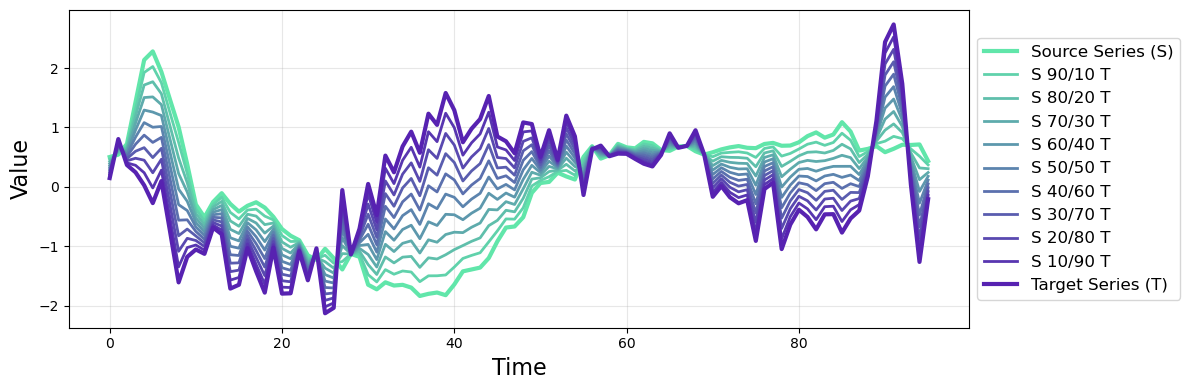

In [2]:
df_name = 'ECG200'

X, y = load_classification(df_name)
le = LabelEncoder()
y = le.fit_transform(y)

source_idx = 0
target_idx = 1 

mor = TSmorph(X[source_idx], X[target_idx], 9)
morphs = mor.transform()
mor.plot_morphed_series(morphs, title=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [2]:
# Load your DataFrame
df = pd.read_csv('article_results\\final_results.csv')

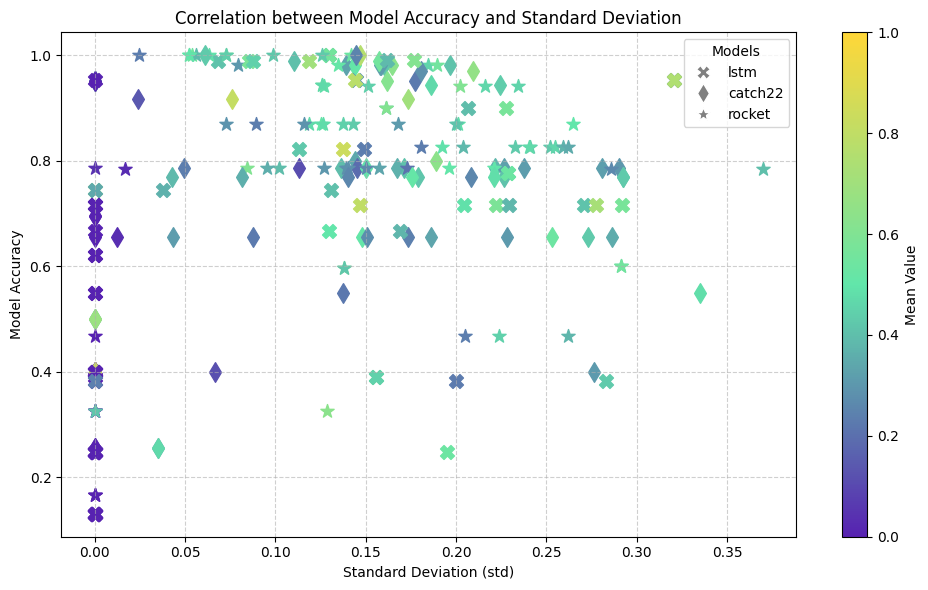

In [6]:
plt.figure(figsize=(10, 6))

# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['ts_length_jittered'] = df['ts_length'] + np.random.uniform(-0.3, 0.3,size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Plot each point
scatter = None  # Initialize scatter object for colorbar
for _, row in df.iterrows():
    scatter = plt.scatter(
        #row['ts_length_jittered'], 
        row['std'], 
        row['model_acc'],
        
        c=row['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[row['model']],  # Marker based on model
        s=100,  # Size of the points
        label=row['model'] if row['model'] not in plt.gca().get_legend_handles_labels()[1] else ""
    )

# Add labels and title
plt.ylabel('Model Accuracy')
plt.xlabel('Standard Deviation (std)')
plt.title('Correlation between Model Accuracy and Standard Deviation')

# Create custom legend for models
handles = []
for model, marker in model_marker_map.items():
    handles.append(plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='gray', markersize=10, label=model))
plt.legend(handles=handles, title='Models')

# Add colorbar for the mean values
if scatter is not None:
    cbar = plt.colorbar(scatter, label='Mean Value')

# Adjust layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_37304\29471469.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar


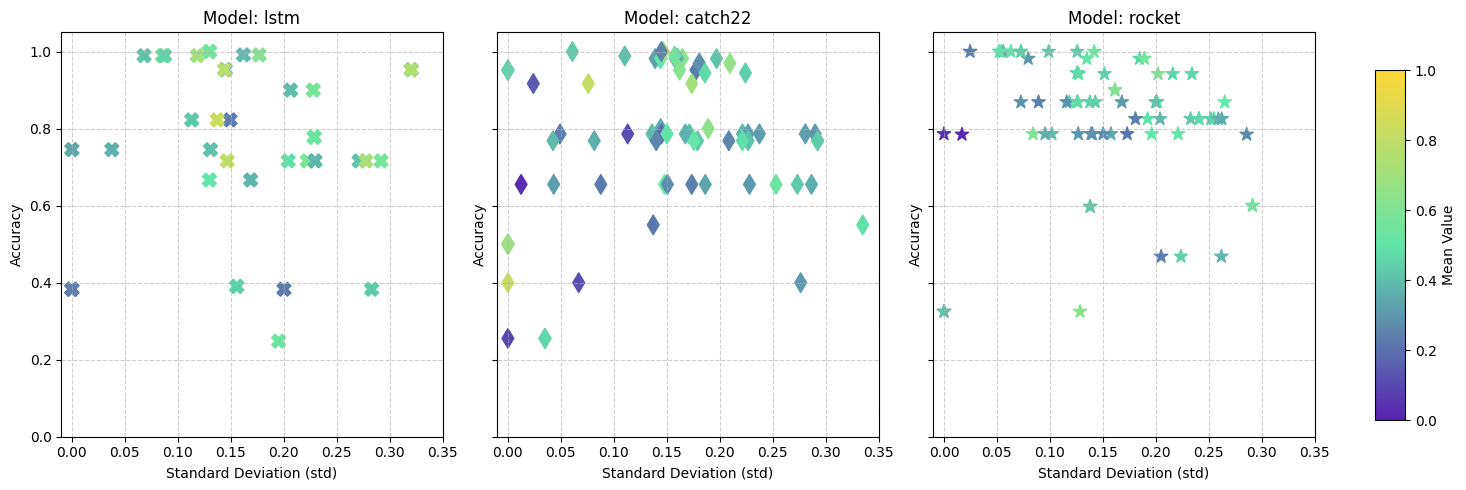

In [14]:
# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['ts_length_jittered'] = df['ts_length'] + np.random.uniform(-0.3, 0.3, size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  # Different markers for each model
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Set up the subplots
fig, axes = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)  # One subplot per model
#fig.suptitle('Correlation between Model Accuracy and Standard Deviation', fontsize=16)

# Plot each model in a separate subplot
for i, model in enumerate(models):
    ax = axes[i]

    model_df = df[df['model'] == model] 
    model_df = df[(df['model'] == model) & ~((df['std'] == 0) & (df['mean'] == 0))]

    # Plot the points
    scatter = ax.scatter(
        model_df['std'], 
        model_df['model_acc'], 
        c=model_df['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[model],  # Marker based on model
        s=100  # Size of the points
    )
    
    # Set axis limits
    ax.set_xlim(-0.01, 0.35)
    ax.set_ylim(0, 1.05)
    ax.margins(x=0.05, y=0.05)  

    # Add labels and title for each subplot
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Standard Deviation (std)')
    ax.set_title(f'Model: {model}')
    ax.grid(True, linestyle='--', alpha=0.6)

# Add a shared colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of the colorbar [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, label='Mean Value')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar
plt.show()